## Домашнее задание 5

Стребежев Игорь

In [1]:
%%html
<style>video{width:480px;height:480px}</style>

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.animation
import matplotlib as mpl
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import normalize
from scipy.special import expit
% matplotlib inline
%config InlineBackend.figure_format = 'retina'
np.set_printoptions(threshold=np.inf)
plt.rc('animation', html='html5')
plt.rcParams["figure.figsize"] = 8, 8

В задачах 2, 3, 5 градиентный спуск нужно делать пока уменьшается ошибка на датасете.

### task 1

Обратное распространение градиента. Напоминание — для последнего слоя нейронной сети $\delta$ выражается как:

$$ \delta^L_i = \frac{\partial L(w)}{ \partial s^L_i } $$ 

Выпишите в явном виде $\delta^L$ для softmax в качестве решающей функциии и кросс-энтропией в качестве функции потерь.

### task 2

Реализуйте алгоритм логистической регрессии со стохастическим градиентным спуском.

In [24]:
df = pd.read_csv(f'spambase_old.csv')
X = df.drop('label', 1).as_matrix()
Y = df.label.map({0: -1, 1: 1}).values

df2 = pd.read_csv(f'spambase_new.csv')
X2 = df2.drop('label', 1).as_matrix()
Y2 = df2.label.map({0: -1, 1: 1}).values


def logistic_train(X, Y, iters=100_000, W = None):
    rate = 0.1  # learning rate
    W = np.random.randn(X.shape[1]) if W is None else W.copy()
    ebest = ((Y * X.dot(W)) < 0).sum()
    wbest = W
    print(ebest, end=' ')
    limit = iters

    while limit > 0:
        limit -= 1
        i = np.random.randint(0, Y.size - 1)  # grub a random sample
        k =  expit(-Y[i] * X[i].dot(W))       # nominator, slide 10
        W += rate * (Y[i] * X[i] * k)         # update weights
        err = ((Y * X.dot(W)) < 0).sum()
        if err < ebest:                       # continue if err gets smaller
            ebest = err
            wbest = W.copy()
            limit = iters
            print(err, end=' ')
            
    print('done')
    return wbest

Обучите его на датасете `spambase_old` (train).

In [409]:
# W = logistic_train(X, Y, W=None)

W = np.array([-4.44334964e+02, -3.42531850e+02, -2.59445328e+02,  1.47926305e+03,        8.01327295e+02,  9.48710085e+02,  3.54677988e+03,  1.55324713e+03,        8.52344457e+02,  4.62304134e+01,  2.53977249e+02, -1.99480324e+03,       -2.10349452e+02, -1.78907298e+02,  2.20554361e+03,  1.78486153e+03,        2.70404100e+03, -9.98807026e+00, -2.19596583e+02,  3.16341622e+03,        1.53405576e+02,  5.93403648e+02,  4.52461243e+03,  1.97909298e+03,       -1.55504208e+04, -7.38900604e+03, -6.31801206e+03, -5.52413052e+02,       -2.18192166e+03, -2.09907823e+03, -1.74741245e+03, -6.88698738e+02,       -5.74739246e+03, -7.32442591e+02, -3.08376105e+03, -1.20939912e+03,       -5.16668985e+03, -1.01287885e+03, -1.95237694e+03, -1.86733959e+03,       -1.75491030e+03, -4.15031608e+03, -1.53133437e+03, -3.02086366e+03,       -3.41890464e+03, -7.17348494e+03, -5.11303945e+02, -2.20498781e+03,       -3.47624322e+03, -3.45943548e+03, -1.03761182e+03,  7.35362845e+02,        4.12547774e+03,  1.07555641e+03, -1.73644270e+02,  6.64030930e+01,         2.03363500e-01])

И проверьте на датасете `spambase_new` (val). Получите ROC кривые для вариантов без нормировки и с нормировкой признаков.

# accuracy
train        0.9201086956521739   auc 0.9614971010117431
train norm   0.9019021739130435   auc 0.9552538646725963
val          0.9196525515743756   auc 0.9610228791571663
val norm     0.9153094462540716   auc 0.9579418586366854


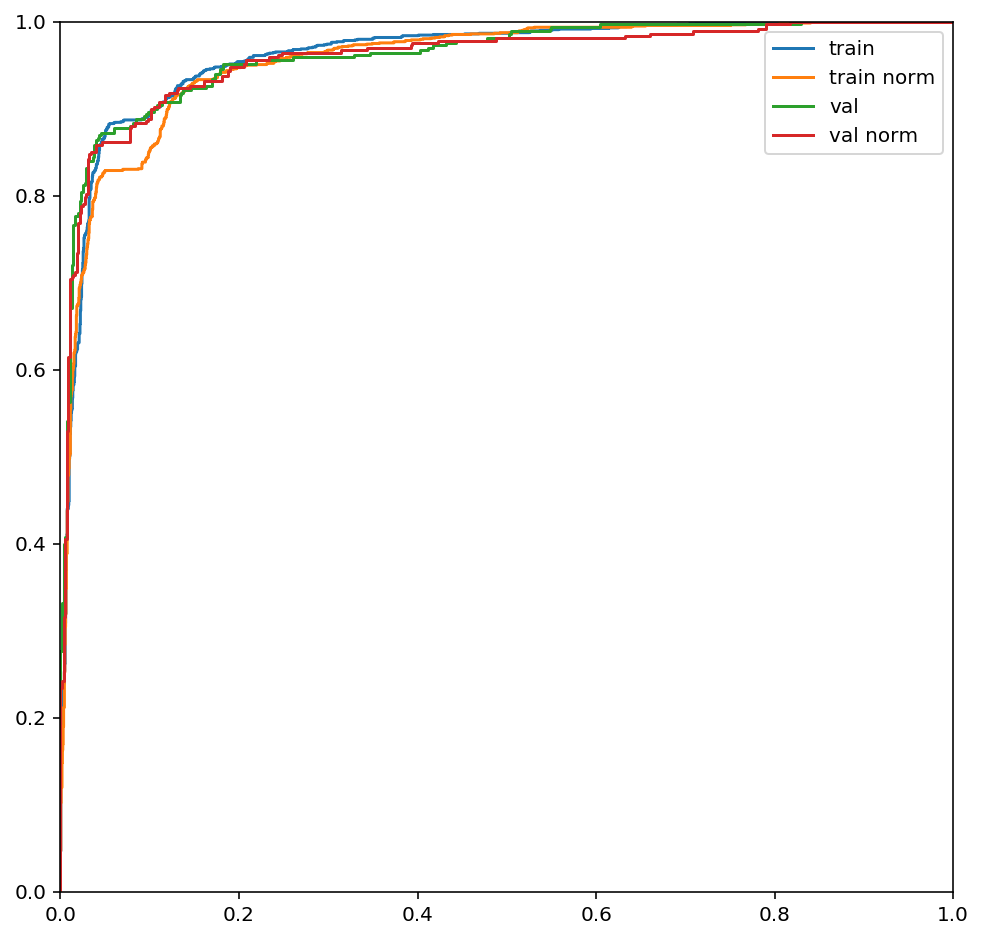

In [411]:
def res(Y, X, name):
    print(name.ljust(12), 1 - ((Y * X.dot(W)) < 0).sum() / Y.size,
         '  auc', roc_auc_score(Y > 0, X.dot(W)))
    fpr, tpr, _ = roc_curve(Y > 0, X.dot(W))
    plt.plot(fpr, tpr, label=name)
    plt.xlim([0, 1]); plt.ylim([0, 1]); plt.legend()

    
print('# accuracy')
res(Y, X, 'train')
res(Y, normalize(X, axis=0), 'train norm')
res(Y2, X2, 'val')
res(Y2, normalize(X2, axis=0), 'val norm')

1915 1905 1904 1903 1902 1895 1894 1893 1892 1891 1890 1889 1887 1886 1884 1883 1882 1880 1878 1877 1876 1875 1874 1873 1872 1869 1868 1863 1862 1861 1860 1857 1855 1854 1853 1851 1848 1847 1845 1843 1842 1839 1838 1837 1836 1835 1834 1833 1832 1829 1824 1823 1822 1818 1817 1816 1814 1812 1809 1807 1806 1801 1798 1797 1794 1785 1784 1779 1778 1777 1776 1774 1773 1772 1771 1770 1769 1768 1767 1766 1764 1762 1761 1760 1759 1758 1756 1754 1751 1748 1747 1745 1744 1742 1741 1740 1739 1736 1734 1733 1731 1730 1728 1725 1724 1723 1721 1720 1719 1716 1715 1713 1712 1710 1709 1708 1707 1705 1702 1699 1696 1695 1692 1691 1689 1687 1686 1685 1681 1680 1679 1678 1676 1674 1671 1670 1668 1666 1665 1662 1658 1657 1655 1654 1653 1644 1641 1639 1638 1633 1631 1630 1629 1628 1627 1625 1624 1623 1621 1620 1619 1618 1617 1616 1615 1613 1612 1611 1609 1607 1605 1604 1603 1602 1600 1599 1597 1596 1595 1591 1589 1585 1582 1578 1575 1571 1569 1568 1565 1563 1560 1559 1557 1555 1551 1545 1544 1542 1541 1539 

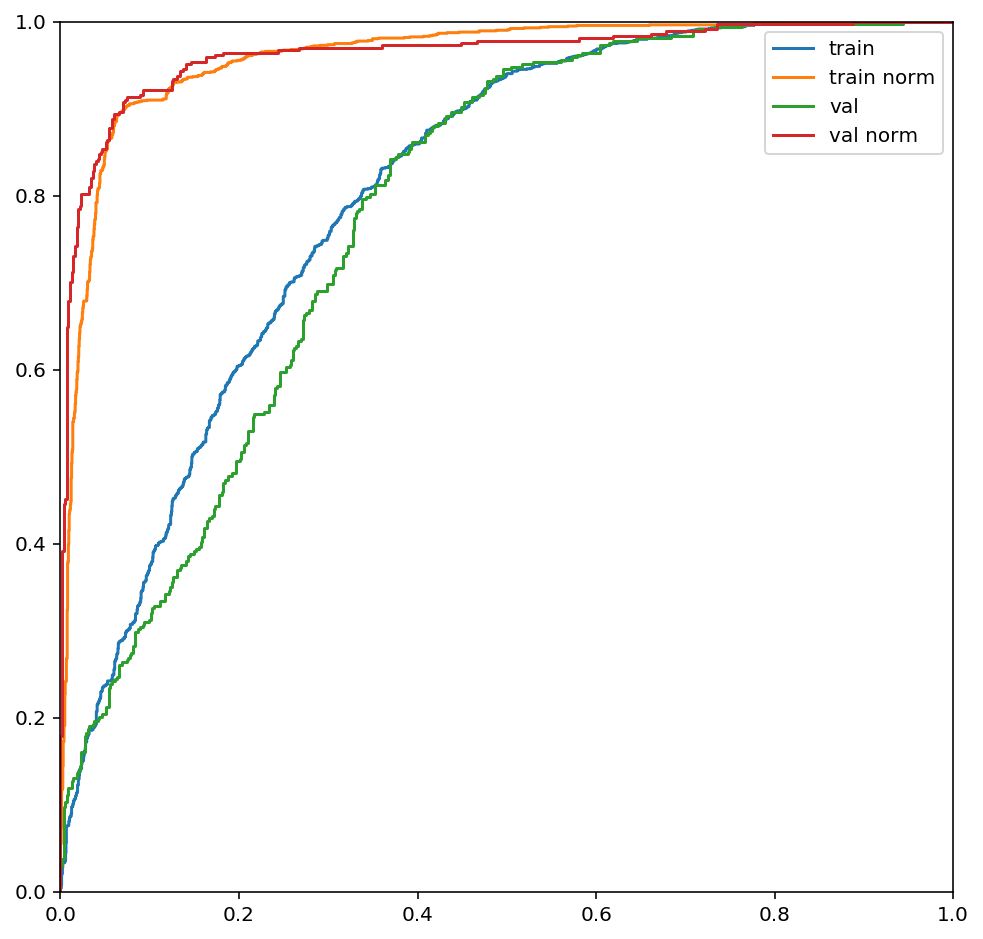

In [5]:
def res(Y, X, name):
    print(name.ljust(12), 1 - ((Y * X.dot(W)) < 0).sum() / Y.size,
         '  auc', roc_auc_score(Y > 0, X.dot(W)))
    fpr, tpr, _ = roc_curve(Y > 0, X.dot(W))
    plt.plot(fpr, tpr, label=name)
    plt.xlim([0, 1]); plt.ylim([0, 1]); plt.legend()

W = logistic_train(normalize(X, axis=0), Y, W=None)


print('# accuracy')
res(Y, X, 'train')
res(Y, normalize(X, axis=0), 'train norm')
res(Y2, X2, 'val')
res(Y2, normalize(X2, axis=0), 'val norm')

### task 3

Модифицируйте модель из задачи 2, добавив 2 скрытых слоя (по 64 нейрона) с функциями активации ReLU в них и реализовав алгоритм обратного распространения градиента.

In [174]:
def forward(X):
    L1 = expit(X.dot(W1))
    L2 = expit(L1.dot(W2))
    L3 = expit(L2.dot(W3))
    return L1, L2, L3


def train(X, Y, iters=1000):
    global W1, W2, W3

    W1 = random((Xn.shape[1], 64)) * 2 - 1
    W2 = random((64, 64)) * 2 - 1
    W3 = random((64, 1))  * 2 - 1

    for iteration in range(iters):
        L1, L2, L3 = forward(X)

        D3 = (Y - L3) * L3 * (1 - L3)
        D2 = D3.dot(W3.T) * L2 * (1 - L2)
        D1 = D2.dot(W2.T) * L1 * (1 - L1)

        W1 += 0.25 * normalize(X.T.dot(D1), axis=0)
        W2 += 0.25 * normalize(L1.T.dot(D2), axis=0)
        W3 += 0.25 * normalize(L2.T.dot(D3), axis=0)

train norm   0.9407608695652174   auc 0.9691318517142349
test norm    0.9131378935939196   auc 0.9686369801084991
train        0.7399456521739131   auc 0.8006971505538654
test         0.738327904451683   auc 0.8137309340356946


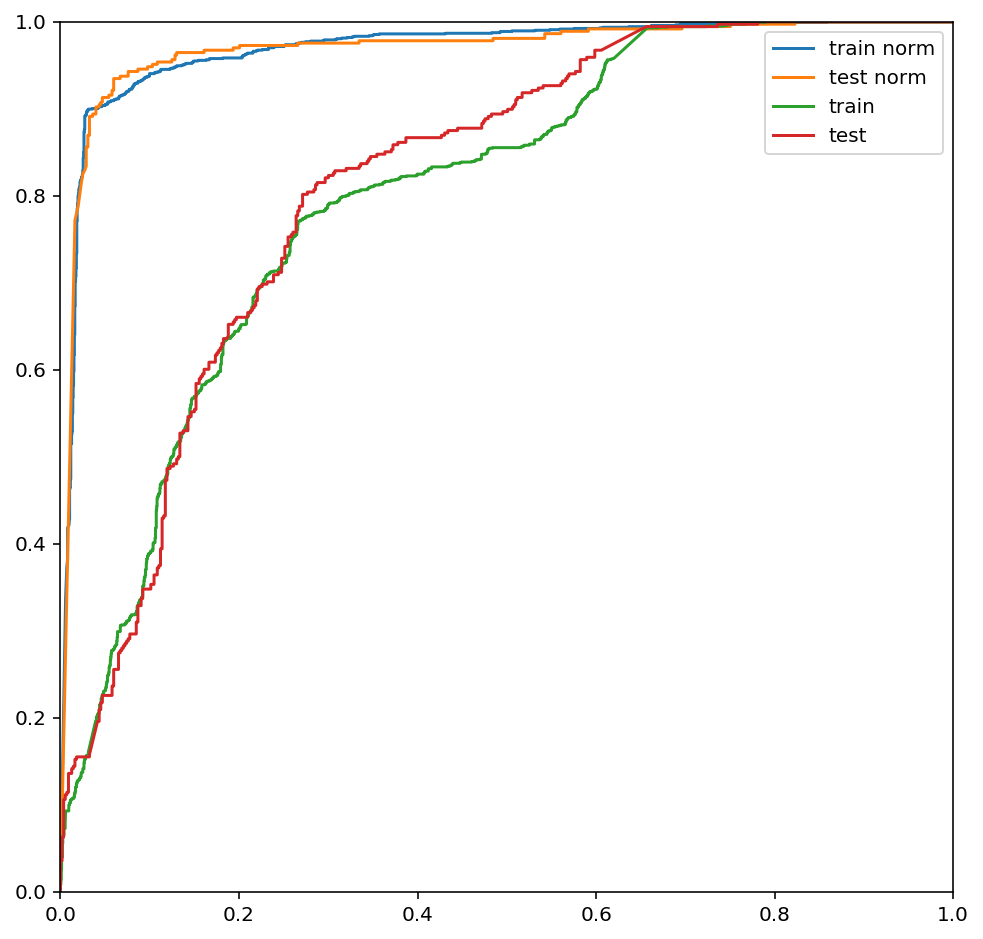

In [175]:
def res(Y, guess, name):
    print(name.ljust(12), ((guess > 0.5) == (Y > 0)).sum() / Y.size,
          '  auc', roc_auc_score(Y > 0, guess))
    fpr, tpr, _ = roc_curve(Y > 0, guess)
    plt.plot(fpr, tpr, label=name)
    plt.xlim([0, 1]); plt.ylim([0, 1]); plt.legend()


Xn = normalize(X, axis=0)
X2n = normalize(X2, axis=0)

train(Xn, Y.reshape((Y.shape[0], 1)))
res(np.array(Y), (forward(Xn)[-1]).flatten(), "train norm")
res(Y2, (forward(X2n)[-1]).flatten(), "test norm")


train(X, Y.reshape((Y.shape[0], 1)))
res(np.array(Y), (forward(X)[-1]).flatten(), "train")
res(Y2, (forward(X2)[-1]).flatten(), "test")

plt.show()

### task 4

Разделите датасет `mnist.csv` на train(80%), val(10%), test(10%) с сохранением пропорций классов. Убедитесь, что пропорции сохранились.

In [2]:
dm = pd.read_csv('mnist.csv', dtype=np.int32).sample(frac=1).reset_index(drop=True)

gen = lambda: pd.DataFrame(columns=dm.columns)
trainM, valM, testM = gen(), gen(), gen()

for num in range(0, 11):
    sub = dm[dm.label == num]
    total = sub.shape[0]
    i80, i90 = int(total * 0.8), int(total * 0.9)
    
    trainM = trainM.append(sub[:i80])
    testM  = testM.append(sub[i80:i90])
    valM   = valM.append(sub[i90:])
    
# Убеждаемся
count = lambda df: df.label.value_counts() / df.shape[0]
pd.concat([count(dm), count(trainM), count(valM), count(testM)], axis=1)

,label,label,label,label
0,0.0980,0.098037,0.097610,0.098098
1,0.1135,0.113543,0.113546,0.113113
2,0.1032,0.103164,0.103586,0.103103
3,0.1010,0.101038,0.100598,0.101101
4,0.0982,0.098162,0.098606,0.098098
5,0.0892,0.089158,0.089641,0.089089
6,0.0958,0.095786,0.095618,0.096096
7,0.1028,0.102789,0.102590,0.103103
8,0.0974,0.097412,0.097610,0.097097
9,0.1009,0.100913,0.100598,0.101101


### task 5

Модифицируйте модель из задачи 3, заменив последний нейрон на 10 нейронов, и реализовав мультиклассовую классификацию с softmax в качестве решающей функции и кросс-энтропией в качестве функции потерь.

In [15]:
def split(df):
    return df.drop('label', 1).as_matrix(), df['label'].as_matrix().astype(np.int32)


trainMX, trainMY = split(trainM)
testMX,  testMY  = split(testM)
valMX,   valMY   = split(valM)

trainMXn = normalize(trainMX, axis=0)
valMXn   = normalize(valMX,   axis=0)
testMXn  = normalize(testMX,  axis=0)

In [87]:
from numpy.random import random

def forward(X):
    L1 = expit(X.dot(W1))
    L2 = expit(L1.dot(W2))
    L3 = expit(L2.dot(W3))
    return L1, L2, L3

def softmax(L3):
    exps = np.exp(L3)# - np.max(L3, axis=1, keepdims=True))
    return exps / np.sum(exps, axis=1, keepdims=True)

def cross_entropy(L3, Y):
    m = Y.shape[0]
    grad = softmax(L3)
    grad[np.arange(m), Y] -= 1
    grad = grad / m
    return grad


def train(X, Y, iters=1000):
    global W1, W2, W3

    W1 = random((X.shape[1], 64)) * 2 - 1
    W2 = random((64, 64)) * 2 - 1
    W3 = random((64, 10))  * 2 - 1

    for iteration in range(iters):
        L1, L2, L3 = forward(X)

        D3 = cross_entropy(L3, Y) * L3 * (1 - L3)
        D2 = D3.dot(W3.T) * L2 * (1 - L2)
        D1 = D2.dot(W2.T) * L1 * (1 - L1)

        W1 += 0.25 * normalize(X.T.dot(D1), axis=0)
        W2 += 0.25 * normalize(L1.T.dot(D2), axis=0)
        W3 += 0.25 * normalize(L2.T.dot(D3), axis=0)

In [ ]:
# def res(Y, guess, name):
#     print(name.ljust(12), ((guess > 0.5) == (Y > 0)).sum() / Y.size,
#           '  auc', roc_auc_score(Y > 0, guess))
#     fpr, tpr, _ = roc_curve(Y > 0, guess)
#     plt.plot(fpr, tpr, label=name)
#     plt.xlim([0, 1]); plt.ylim([0, 1]); plt.legend()



train(trainMXn, np.reshape(trainMY, (trainMY.shape[0], 1)), 5)
# r = forward(trainMXn)[-1]

r = softmax(forward(trainMXn)[-1]).argmax(axis=1)

# roc_auc(mnist_train_y, train_res, "train")

In [92]:
np.bincount(r)
# np.bincount(trainMY)

22216

### task 6

Решите задачу 5 с помощью kNN, дерева и случайных лесов(проведя разумный подбор параметров по val датасету). Сравните результатына test датасете.